In [ ]:
import pyupbit

price = pyupbit.get_current_price("KRW-BTC")
print(price)

법화가 KRW인 시장의 매매가능목록

In [ ]:
print(pyupbit.get_tickers(fiat='KRW'))

암호화폐의 최근 체결가격

In [ ]:
print(pyupbit.get_current_price("KRW-BTC"))

In [ ]:
print(pyupbit.get_current_price(["KRW-BTC", "KRW-XRP"]))

고가/시가/저가/종가/거래량을 DataFrame으로 반환

In [3]:
import pyupbit
df = pyupbit.get_ohlcv("KRW-BTC")
df = df.reset_index().rename(columns={"index": "date"})
df.head()

,date,open,high,low,close,volume,value
0,2025-01-14 09:00:00,142108000.0,144999000.0,141684000.0,143501000.0,2548.983111,3.655501e+11
1,2025-01-15 09:00:00,143546000.0,147724000.0,142997000.0,147309000.0,3708.088650,5.393044e+11
2,2025-01-16 09:00:00,147309000.0,147804000.0,144102000.0,146670000.0,3192.450194,4.665994e+11
3,2025-01-17 09:00:00,146750000.0,155509000.0,146661000.0,152345000.0,4834.721595,7.319772e+11
4,2025-01-18 09:00:00,152434000.0,156530000.0,151533000.0,155801000.0,3748.133802,5.778274e+11


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.patches import Rectangle
from datetime import datetime, timedelta

def plot_candlestick(df: pd.DataFrame, period: str = "1w"):
    """
    캔들 차트를 기간별로 필터링해서 그리는 함수
    period:"1w" (1주일), "5d" (5일), "1m" (1개월), "6m" (6개월)
    """
    df = df.copy()
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values(by="date")

    current_date = df["date"].max()


    if period == "1w":
        start_date = current_date - timedelta(weeks=1)
    elif period == "5d":
        start_date = current_date - timedelta(days=5)
    elif period == "1m":
        start_date = current_date - timedelta(days=30)
    elif period == "6m":
        start_date = current_date - timedelta(days=180)
    else:
        raise ValueError("period must be one of ['1w','5d','1m','6m']")

    df_filtered = df[df["date"] >= start_date]

    # 차트 그리기
    fig, ax = plt.subplots(figsize=(30, 10))

    for _, row in df_filtered.iterrows():
        color = "red" if row["close"] >= row["open"] else "blue"
        ax.plot([row["date"], row["date"]], [row["low"], row["high"]], color=color, linewidth=1)

        rect = Rectangle(
            (mdates.date2num(row["date"]) - 0.2, min(row["open"], row["close"])),
            0.4,
            abs(row["close"] - row["open"]),
            facecolor=color,
        )
        ax.add_patch(rect)

    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    ax.set_xlabel("Date", fontsize=20)
    ax.set_ylabel("Price", fontsize=20)
    ax.set_title(f"Candlestick Chart ({period})", fontsize=22)

    plt.xticks(rotation=45, fontsize=17)
    plt.yticks(fontsize=17)
    plt.tight_layout()
    plt.show()

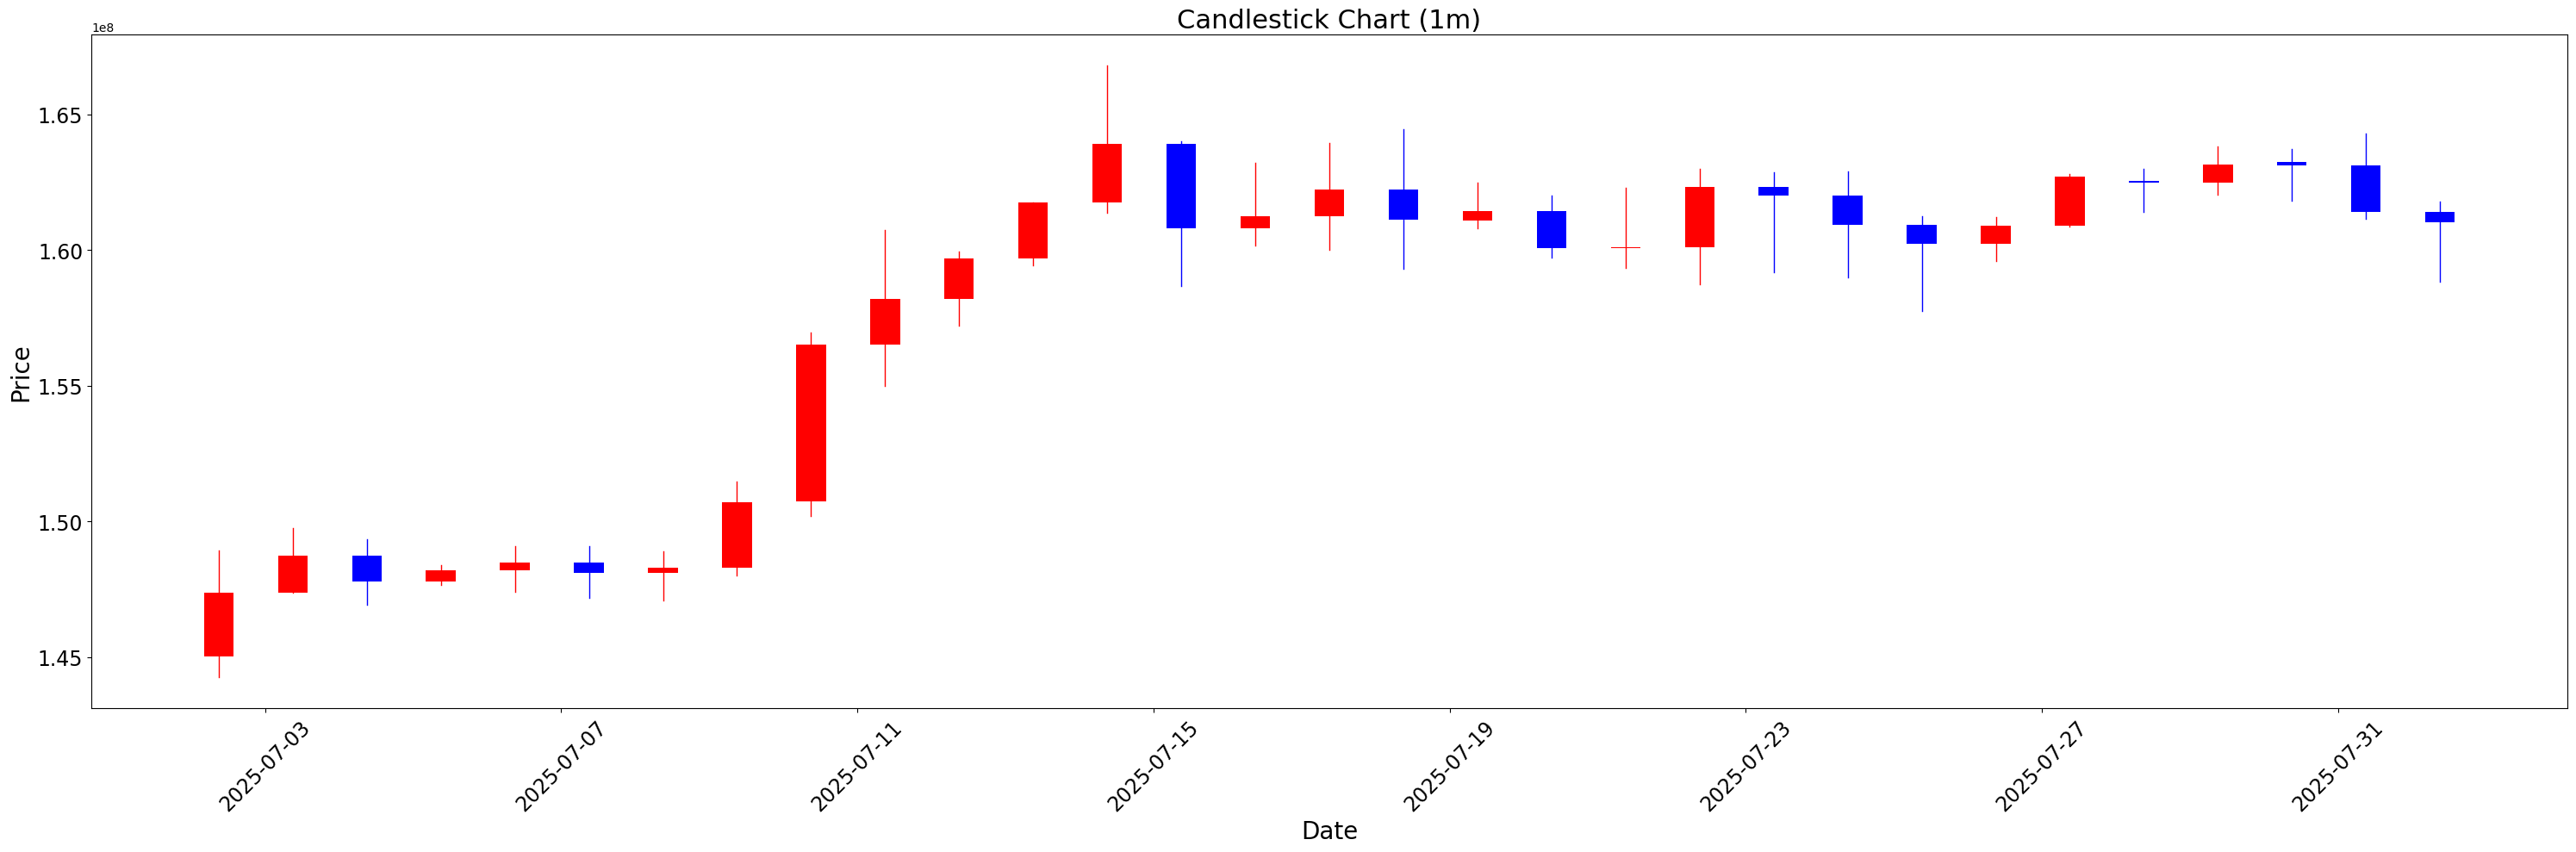

In [53]:
df = pyupbit.get_ohlcv("KRW-BTC").reset_index(names="date")
plot_candlestick(df, period="1m")

In [ ]:
# yest = df[(df.index.date == pd.to_datetime("2025-07-31").date()) ]

In [ ]:
# df[(df.index.date >= pd.to_datetime("2025-07-30").date()) &
#    (df.index.date <= pd.to_datetime("2025-07-31").date())]

In [32]:
df.sort_values(by="date", ascending=True)


,date,open,high,low,close,volume,value
0,2025-01-14 09:00:00,142108000.0,144999000.0,141684000.0,143501000.0,2548.983111,3.655501e+11
1,2025-01-15 09:00:00,143546000.0,147724000.0,142997000.0,147309000.0,3708.088650,5.393044e+11
2,2025-01-16 09:00:00,147309000.0,147804000.0,144102000.0,146670000.0,3192.450194,4.665994e+11
3,2025-01-17 09:00:00,146750000.0,155509000.0,146661000.0,152345000.0,4834.721595,7.319772e+11
4,2025-01-18 09:00:00,152434000.0,156530000.0,151533000.0,155801000.0,3748.133802,5.778274e+11
...,...,...,...,...,...,...,...
195,2025-07-28 09:00:00,162548000.0,162985000.0,161391000.0,162483000.0,1461.599378,2.371703e+11
196,2025-07-29 09:00:00,162483000.0,163800000.0,162034000.0,163158000.0,1487.534324,2.426350e+11
197,2025-07-30 09:00:00,163248000.0,163708000.0,161800000.0,163118000.0,1209.086733,1.969072e+11
198,2025-07-31 09:00:00,163118000.0,164300000.0,161138000.0,161398000.0,1460.987469,2.383485e+11


In [35]:
df_1min = pyupbit.get_ohlcv_from(ticker="KRW-BTC", interval="minute1", fromDatetime='2025-08-01 09:00:00', to='2025-08-01 09:05:00', period=0.1).reset_index(names="date")
df_1min.sort_values(by="date", ascending=False)


,date,open,high,low,close,volume,value
199,2025-08-01 14:05:00,161280000.0,161287000.0,161280000.0,161287000.0,0.187594,3.025596e+07
198,2025-08-01 14:04:00,161199000.0,161280000.0,161189000.0,161280000.0,0.667698,1.076475e+08
197,2025-08-01 14:03:00,161150000.0,161200000.0,161099000.0,161200000.0,2.740563,4.417369e+08
196,2025-08-01 14:02:00,161119000.0,161150000.0,161100000.0,161150000.0,0.381308,6.143787e+07
195,2025-08-01 14:01:00,161102000.0,161119000.0,161035000.0,161119000.0,0.525441,8.464925e+07
...,...,...,...,...,...,...,...
4,2025-08-01 10:50:00,160187000.0,160262000.0,160050000.0,160050000.0,4.482560,7.180789e+08
3,2025-08-01 10:49:00,160359000.0,160359000.0,160054000.0,160150000.0,5.283495,8.465064e+08
2,2025-08-01 10:48:00,160382000.0,160384000.0,160267000.0,160359000.0,2.002510,3.210665e+08
1,2025-08-01 10:47:00,160477000.0,160487000.0,160271000.0,160381000.0,2.620664,4.203045e+08


In [38]:
df_1min

,date,open,high,low,close,volume,value
0,2025-08-01 10:46:00,160510000.0,160510000.0,160395000.0,160487000.0,2.381297,3.820382e+08
1,2025-08-01 10:47:00,160477000.0,160487000.0,160271000.0,160381000.0,2.620664,4.203045e+08
2,2025-08-01 10:48:00,160382000.0,160384000.0,160267000.0,160359000.0,2.002510,3.210665e+08
3,2025-08-01 10:49:00,160359000.0,160359000.0,160054000.0,160150000.0,5.283495,8.465064e+08
4,2025-08-01 10:50:00,160187000.0,160262000.0,160050000.0,160050000.0,4.482560,7.180789e+08
...,...,...,...,...,...,...,...
195,2025-08-01 14:01:00,161102000.0,161119000.0,161035000.0,161119000.0,0.525441,8.464925e+07
196,2025-08-01 14:02:00,161119000.0,161150000.0,161100000.0,161150000.0,0.381308,6.143787e+07
197,2025-08-01 14:03:00,161150000.0,161200000.0,161099000.0,161200000.0,2.740563,4.417369e+08
198,2025-08-01 14:04:00,161199000.0,161280000.0,161189000.0,161280000.0,0.667698,1.076475e+08


In [55]:
def plot_candlestick_with_ma(
        df: pd.DataFrame,
        period: str = "1w",
        ma_windows: list[int] = [5, 10, 20, 60, 120],
        ma_colors: dict[int, str] = None
):
    """
    캔들 차트 + 이동평균선 (5,10,20,60,120일)
    period: "1w", "5d", "1m", "6m"
    ma_windows: 이동평균 윈도우 리스트
    ma_colors: {윈도우: 색상} 매핑
    """
    # 기본 색상 매핑
    if ma_colors is None:
        ma_colors = {
            5:   "red",
            10:  "blue",
            20:  "yellow",
            60:  "orange",
            120: "green",
        }

    df = df.copy()
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values("date")

    # 이동평균 계산
    for w in ma_windows:
        df[f"MA{w}"] = df["close"].rolling(window=w).mean()

    current_date = df["date"].iloc[-1]

    # 기간 필터링
    if period == "1w":
        start_date = current_date - timedelta(weeks=1)
    elif period == "5d":
        start_date = current_date - timedelta(days=5)
    elif period == "1m":
        start_date = current_date - timedelta(days=30)
    elif period == "6m":
        start_date = current_date - timedelta(days=180)
    else:
        raise ValueError("period must be one of ['1w','5d','1m','6m']")

    df_f = df[df["date"] >= start_date]

    # 차트 그리기
    fig, ax = plt.subplots(figsize=(30, 10))

    # 캔들
    for _, row in df_f.iterrows():
        color = "red" if row["close"] >= row["open"] else "blue"
        ax.plot([row["date"], row["date"]], [row["low"], row["high"]], color=color, linewidth=1)
        rect = Rectangle(
            (mdates.date2num(row["date"]) - 0.2, min(row["open"], row["close"])),
            0.4,
            abs(row["close"] - row["open"]),
            facecolor=color,
        )
        ax.add_patch(rect)

    # 이동평균선
    for w in ma_windows:
        ax.plot(
            df_f["date"],
            df_f[f"MA{w}"],
            label=f"MA{w}",
            linewidth=2,
            color=ma_colors.get(w, "black")  # 지정된 색이 없으면 검정
        )

    # 포맷팅
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    ax.set_xlabel("Date", fontsize=20)
    ax.set_ylabel("Price", fontsize=20)
    ax.set_title(f"Candlestick + MA ({period})", fontsize=22)
    plt.legend(fontsize=16)
    plt.xticks(rotation=45, fontsize=17)
    plt.yticks(fontsize=17)
    plt.tight_layout()
    plt.show()

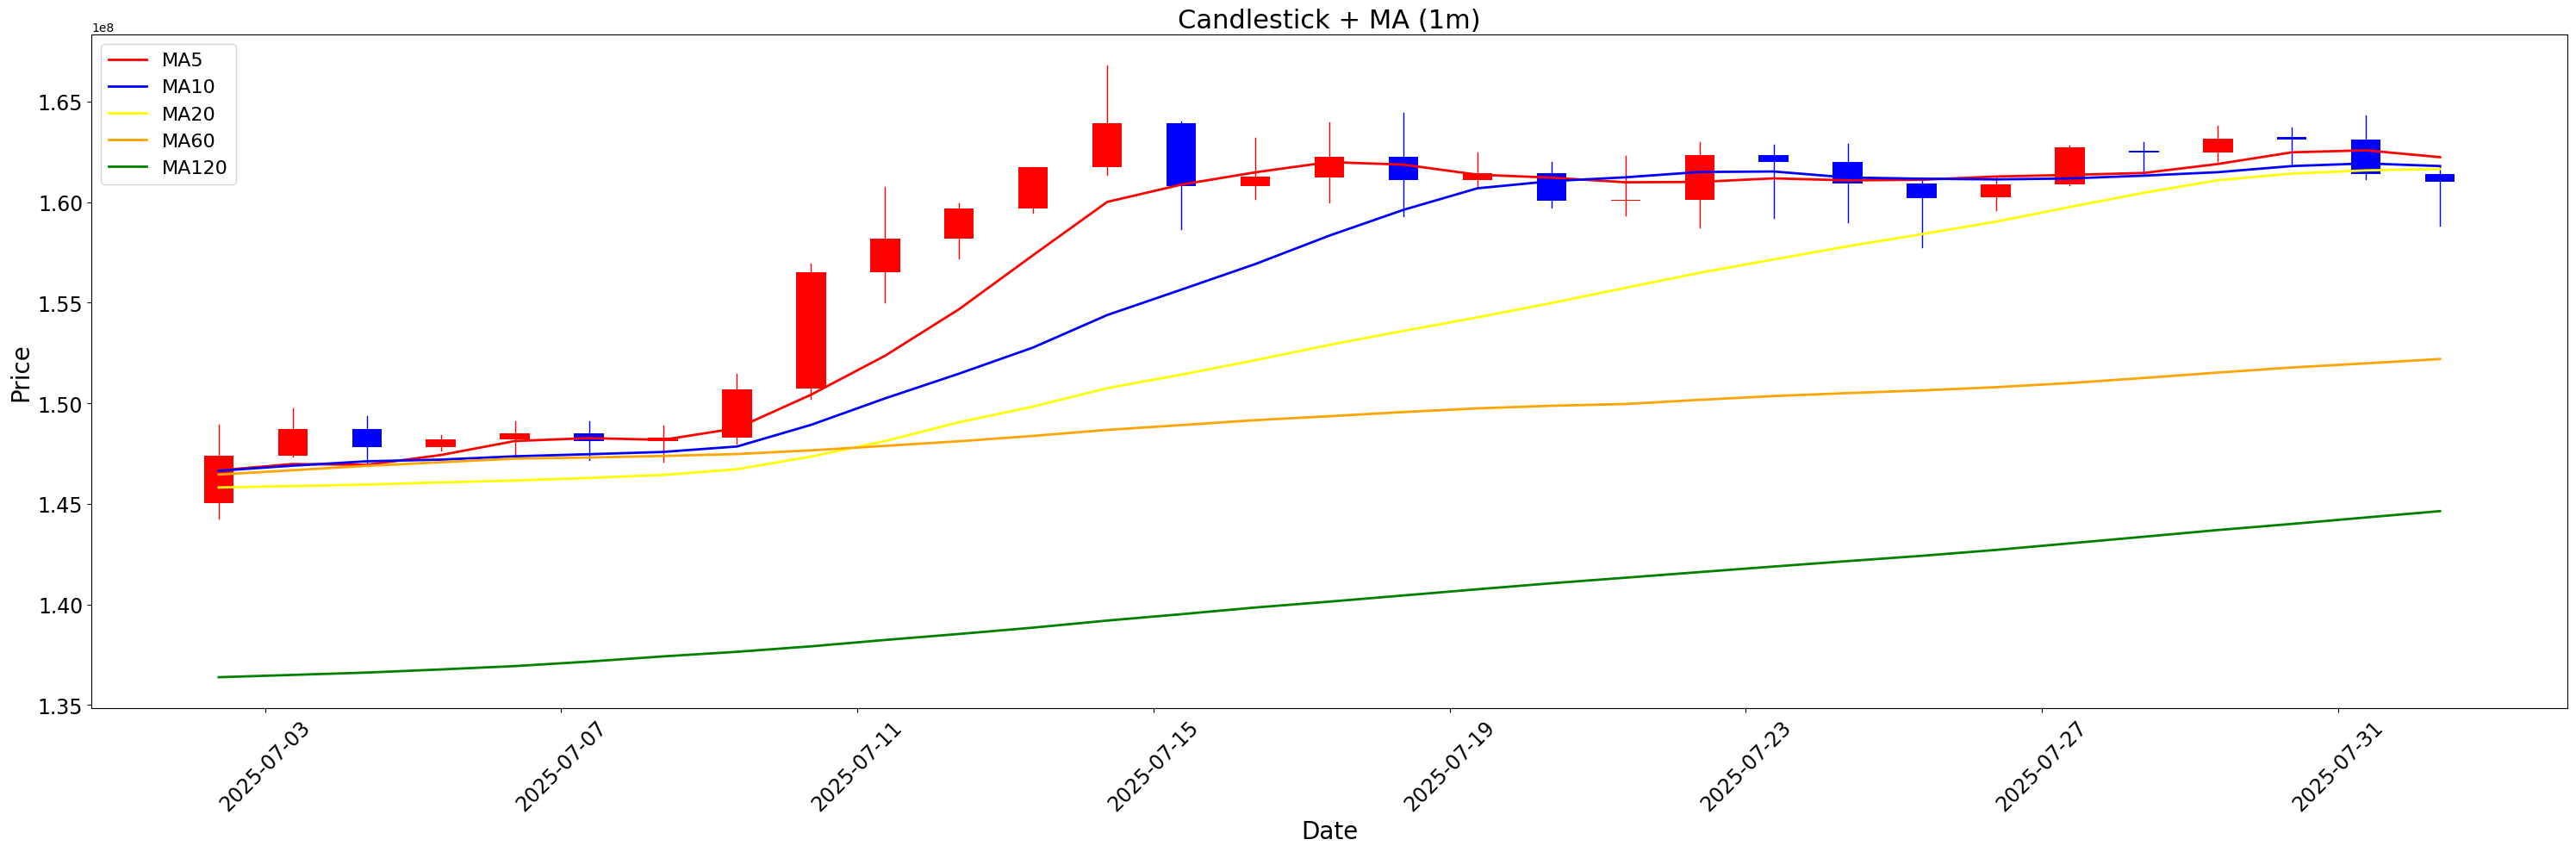

In [56]:
plot_candlestick_with_ma(df, period="1m")

In [62]:
df

,open,high,low,close,volume,value
2025-01-14 09:00:00,142108000.0,144999000.0,141684000.0,143501000.0,2548.983111,3.655501e+11
2025-01-15 09:00:00,143546000.0,147724000.0,142997000.0,147309000.0,3708.088650,5.393044e+11
2025-01-16 09:00:00,147309000.0,147804000.0,144102000.0,146670000.0,3192.450194,4.665994e+11
2025-01-17 09:00:00,146750000.0,155509000.0,146661000.0,152345000.0,4834.721595,7.319772e+11
2025-01-18 09:00:00,152434000.0,156530000.0,151533000.0,155801000.0,3748.133802,5.778274e+11
...,...,...,...,...,...,...
2025-07-28 09:00:00,162548000.0,162985000.0,161391000.0,162483000.0,1461.599378,2.371703e+11
2025-07-29 09:00:00,162483000.0,163800000.0,162034000.0,163158000.0,1487.534324,2.426350e+11
2025-07-30 09:00:00,163248000.0,163708000.0,161800000.0,163118000.0,1209.086733,1.969072e+11
2025-07-31 09:00:00,163118000.0,164300000.0,161138000.0,161398000.0,1460.987469,2.383485e+11


In [57]:
# ✅ API 호출은 한 번만!
from backtest import GET_ROR
import numpy as np
df = pyupbit.get_ohlcv(ticker="KRW-BTC")

if df is None:
    raise ValueError("⚠️ get_ohlcv()에서 데이터를 가져오지 못했습니다.")
res = []
for i in np.arange(0.01, 1, 0.01):
    ROR = GET_ROR(df, i)
    res.append({"k": i, "ror": ROR})
df_result = pd.DataFrame(res)
df_result

0.01 0.8594289750557231
0.060000000000000005 0.8602102512496977
0.11 0.8727898601604256
0.16 0.9131827524200956
0.21000000000000002 0.8422621517500791
0.26 0.8697221475269311
0.31 0.9386222889017722
0.36000000000000004 0.933754635065993
0.41000000000000003 0.8881424426030197
0.46 0.9358253400128085
0.51 0.9920389987953292
0.56 1.0152243689178286
0.61 1.0264697711620923
0.66 1.0478171100523654
0.7100000000000001 1.0742019802095413
0.76 1.051840952552758
0.81 1.033059240360907
0.8600000000000001 1.0479106089388959
0.91 1.0926719470304809
0.9600000000000001 1.0703871245433711


,k,ror
0,0.01,0.859429
1,0.02,0.827853
2,0.03,0.942425
3,0.04,0.905056
4,0.05,0.865445
...,...,...
94,0.95,1.077496
95,0.96,1.070387
96,0.97,1.063327
97,0.98,1.099198


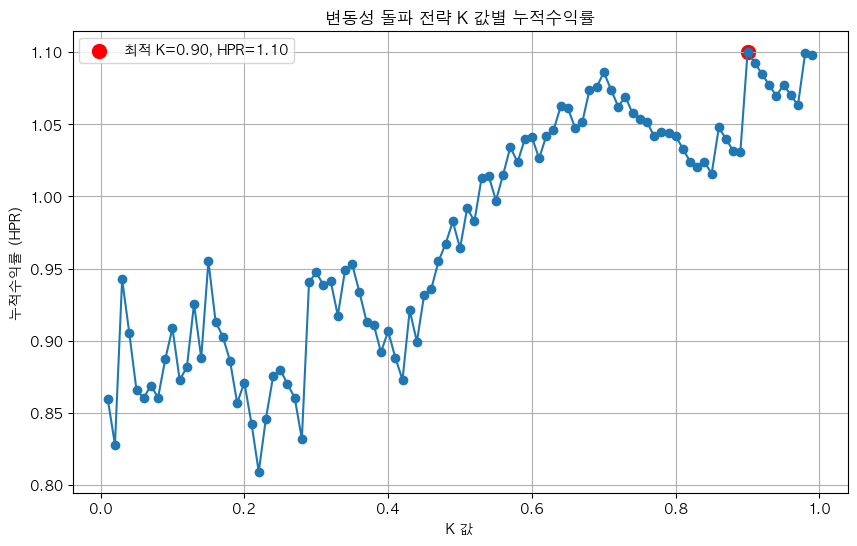

In [61]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'  # macOS 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지
# 최적 K 값 찾기
best_idx = df_result["ror"].idxmax()
best_K = df_result.loc[best_idx, "k"]
best_ROR = df_result.loc[best_idx, "ror"]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_result["k"], df_result["ror"], marker="o", linestyle="-")
plt.xlabel("K 값")
plt.ylabel("누적수익률 (HPR)")
plt.title("변동성 돌파 전략 K 값별 누적수익률")

# 최고점 표시
plt.scatter(best_K, best_ROR, color="red", s=100, label=f"최적 K={best_K:.2f}, HPR={best_ROR:.2f}")
plt.legend()
plt.grid(True)
plt.show()

# k 값 최적화하기

In [66]:
top_5 = df_result.nlargest(5, "ror")
top_5

,k,ror
89,0.90,1.100430
97,0.98,1.099198
98,0.99,1.098087
90,0.91,1.092672
69,0.70,1.086217


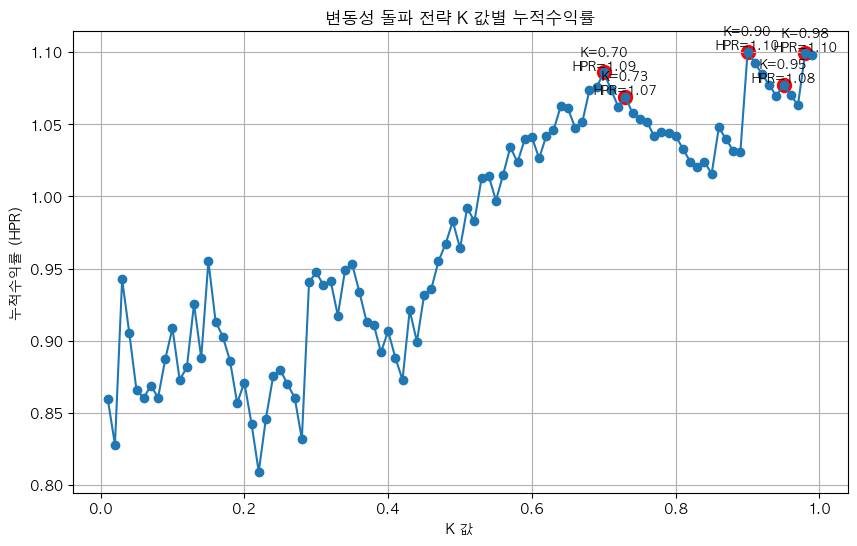

In [65]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 국소 최대값(꼭짓점) 찾기
local_maxima = []
ror_values = df_result["ror"].values
k_values = df_result["k"].values

for i in range(1, len(df_result) - 1):
    if ror_values[i] > ror_values[i-1] and ror_values[i] > ror_values[i+1]:
        local_maxima.append((k_values[i], ror_values[i]))

# 누적수익률(ror)이 큰 순서로 정렬 후 상위 5개 선택
top_5_peaks = sorted(local_maxima, key=lambda x: x[1], reverse=True)[:5]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_result["k"], df_result["ror"], marker="o", linestyle="-")
plt.xlabel("K 값")
plt.ylabel("누적수익률 (HPR)")
plt.title("변동성 돌파 전략 K 값별 누적수익률")

# 5개의 꼭짓점 표시
for k, ror in top_5_peaks:
    plt.scatter(k, ror, color="red", s=100)
    plt.text(k, ror, f"K={k:.2f}\nHPR={ror:.2f}", ha="center", va="bottom", fontsize=9)

plt.grid(True)
plt.show()


In [63]:
import os
from dotenv import load_dotenv
import pyupbit
import time, datetime
import pandas as pd
import numpy as np

load_dotenv()
access_key = os.environ.get('UPBIT_ACCESS_KEY')
secret_key = os.environ.get('UPBIT_SECRET_KEY')
upbit=pyupbit.Upbit(access_key, secret_key)
KRW_BALANCE = upbit.get_balance('KRW')

In [64]:
KRW_BALANCE

2000000.0